<a href="https://colab.research.google.com/github/nisargbm/ACPS/blob/master/handwriting_ocr%2Bdictionary_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install mxnet
!pip install mxboard
!pip install gluonnlp

    100% |████████████████████████████████| 28.4MB 1.5MB/s 
    100% |████████████████████████████████| 61kB 30.1MB/s 
    100% |████████████████████████████████| 13.8MB 4.2MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 1.0.0 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
   

    100% |████████████████████████████████| 51kB 2.4MB/s 
    100% |████████████████████████████████| 215kB 31.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp


In [0]:
!pip install stringdist

  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built stringdist


In [0]:
 %cd gdrive/My Drive/HandwrittenTextRecognition_MXNet-master2

/content/gdrive/My Drive/HandwrittenTextRecognition_MXNet-master2


In [0]:
import difflib
import math
import random
import string
#random.seed(123)

import gluonnlp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mxnet as mx
import numpy as np
from skimage import transform as skimage_tf
from utils.iam_dataset import IAMDataset, resize_image, crop_image, crop_handwriting_page
from tqdm import tqdm
from utils.expand_bounding_box import expand_bounding_box
from utils.sclite_helper import Sclite_helper
from utils.word_to_line import sort_bbs_line_by_line, crop_line_images

from paragraph_segmentation_dcnn import make_cnn as ParagraphSegmentationNet, paragraph_segmentation_transform
from word_segmentation import SSD as WordSegmentationNet, predict_bounding_boxes
from handwriting_line_recognition import Network as HandwritingRecognitionNet, handwriting_recognition_transform
from handwriting_line_recognition import decode as decoder_handwriting, alphabet_encoding
import re
import glob


In [0]:
ctx = mx.cpu()

## Dataset creation
Obtain the original forms from the IAM dataset and plot the results. Randomly select 4 images for analysis.

In [0]:

all_file = glob.glob('FYP/Automated cheque processing/dataset/Cheque_Wrong/'+'*.jpg')
for i in all_file:
  print(i)

FYP/Automated cheque processing/dataset/Cheque_Wrong/309108.jpg
FYP/Automated cheque processing/dataset/Cheque_Wrong/309158.jpg
FYP/Automated cheque processing/dataset/Cheque_Wrong/309111.jpg


In [0]:
!pip install python-docx


    100% |████████████████████████████████| 5.5MB 1.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [0]:
from docx import Document
#from docx.shared import Inches

document = Document()

# p = document.add_paragraph()
# r = p.add_run()
# r.add_text('Good Morning every body,This is my ')
# r.add_picture('/tmp/foo.jpg')
# r.add_text(' do you like it?')



FYP/Automated cheque processing/dataset/Cheque_Wrong/309108.jpg
Distacne
Five Iatch liwanti- Ahorizndd
['Five', 'Iatch', 'liwanti', '', 'Ahorizndd']
['Five', 'Iatch', 'liwanti', 'Ahorizndd']
[[('five', 0), ('nine', 2), ('one', 3), ('four', 3), ('six', 3)], [('lakh', 3), ('two', 4), ('ten', 4), ('fifty', 4), ('sixty', 4)], [('twenty', 4), ('eight', 5), ('nine', 5), ('fifty', 5), ('sixty', 5)], [('thousand', 5), ('and', 6), ('one', 7), ('three', 7), ('nine', 7)]]
Result of  [('five lakh twenty thousand ', 12), ('five lakh eight thousand ', 13), ('five lakh nine thousand ', 13), ('five lakh fifty thousand ', 13), ('five lakh sixty thousand ', 13), ('five lakh twenty one ', 14), ('five lakh twenty three ', 14), ('five lakh twenty nine ', 14), ('nine lakh twenty thousand ', 14), ('five lakh fifty one ', 15), ('five lakh fifty three ', 15), ('five lakh fifty nine ', 15), ('five lakh sixty one ', 15), ('five lakh sixty three ', 15), ('five lakh sixty nine ', 15), ('nine lakh eight thousand ',

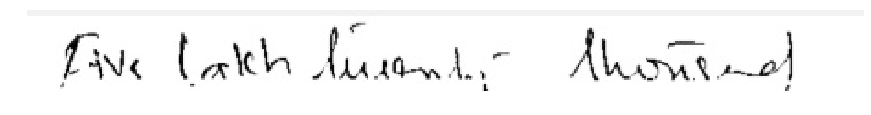

FYP/Automated cheque processing/dataset/Cheque_Wrong/309158.jpg
Distacne
fim Core twventy laleks
['fim', 'Core', 'twventy', 'laleks']
['fim', 'Core', 'twventy', 'laleks']
[[('five', 2), ('six', 2), ('one', 3), ('two', 3), ('four', 3)], [('crore', 1), ('one', 2), ('three', 3), ('four', 3), ('five', 3)], [('twenty', 1), ('seventy', 2), ('seven', 4), ('ten', 4), ('twelve', 4)], [('lakh', 3), ('rupees', 4), ('one', 5), ('three', 5), ('five', 5)]]
Result of  [('five crore twenty lakh ', 7), ('six crore twenty lakh ', 7), ('five crore twenty rupees ', 8), ('five crore seventy lakh ', 8), ('six crore twenty rupees ', 8), ('six crore seventy lakh ', 8), ('one crore twenty lakh ', 8), ('two crore twenty lakh ', 8), ('four crore twenty lakh ', 8), ('five crore twenty one ', 9), ('five crore twenty three ', 9), ('five crore twenty five ', 9), ('five crore seventy rupees ', 9), ('six crore twenty one ', 9), ('six crore twenty three ', 9), ('six crore twenty five ', 9), ('six crore seventy rupees '

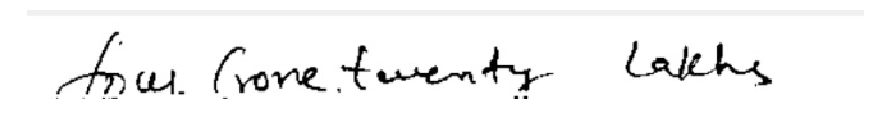

FYP/Automated cheque processing/dataset/Cheque_Wrong/309111.jpg
Distacne
Two cnanefif " Pakinie.
['Two', 'cnanefif', '"', 'Pakinie', '']
['Two', 'cnanefif', 'Pakinie']
[[('two', 0), ('ten', 2), ('one', 3), ('six', 3), ('and', 3)], [('nine', 5), ('ninety', 5), ('one', 6), ('nineteen', 6), ('crore', 6)], [('nine', 4), ('one', 5), ('five', 5), ('lakh', 5), ('and', 5)]]
Result of  [('two crore nine ', 10), ('two crore one ', 11), ('two crore five ', 11), ('two crore and ', 11), ('ten crore nine ', 12), ('ten crore one ', 13), ('ten crore five ', 13), ('ten crore and ', 13), ('one crore nine ', 13), ('six crore nine ', 13), ('one crore one ', 14), ('one crore five ', 14), ('one crore and ', 14), ('six crore one ', 14), ('six crore five ', 14), ('six crore and ', 14)]


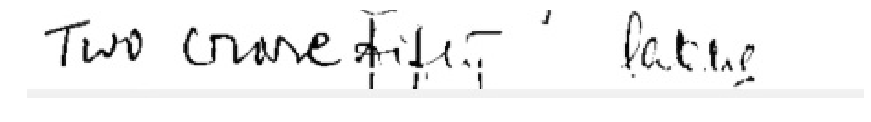

In [0]:
import cv2
import glob
import ntpath

#import sys

#sys.stdout = open('output_file', 'w')

all_file = glob.glob('FYP/Automated cheque processing/dataset/Cheque_Wrong/'+'*.jpg')
#count = 0

for meet in all_file:
  
  p1 = document.add_paragraph()
  p = p1.add_run()
#   count += 1
#   if count>3:
#     break
    
  
  
  im = cv2.imread(meet, cv2.IMREAD_GRAYSCALE)
  img_arr = np.asarray(im)
  test_ds = img_arr
  
  #print(test_ds)
  figs_to_plot = 1
  images = []
  p.add_picture(meet)
  p.add_break()
  #plt.imshow(im)

  p.bold = True
  str1 = meet #ntpath.basename(meet).split('_')[2]
  print(str1)
  p.add_text(str1)
  p.add_break()
  p.add_break()
  p.bold = False

  for i in range(0, figs_to_plot):
      n = int(random.random()*1)
      image= test_ds
      images.append(image)
  images = image
  #print(image)
  #print(images)
  #print(image.shape)
  image = 255 - image
  #print(image)
  fig, axs = plt.subplots(1, 1, figsize=(15, 20))
  #for i, image in enumerate(images):
  y, x = 0,0
  axs.imshow(image, cmap='Greys_r')
  #cv2.imwrite('output_file',image)
  #f.write()
  axs.axis('off')
  #axs.show()
  ## Line/word segmentation
  #Given a form with only handwritten text, predict a bounding box for each word. The model was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/word_segmentation.py



  ## Line/word segmentation
  #Given a form with only handwritten text, predict a bounding box for each word. The model was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/word_segmentation.py
  word_segmentation_net = WordSegmentationNet(2, ctx=ctx)
  word_segmentation_net.load_parameters("models/word_segmentation2.params")

  min_c = 0.1
  overlap_thres = 0.1
  topk = 600
  paragraph_segmented_images = []
  paragraph_segmented_images.append(image)

  # fig, axs = plt.subplots(int(len(paragraph_segmented_images)/2), 2, 
  #                         figsize=(15, 5 * int(len(paragraph_segmented_images)/2)))
  # predicted_words_bbs_array = []

  # for i, paragraph_segmented_image in enumerate(paragraph_segmented_images):
  #     s_y, s_x = int(i/2), int(i%2)

  #     predicted_bb = predict_bounding_boxes(
  #         word_segmentation_net, paragraph_segmented_image, min_c, overlap_thres, topk, ctx)

  #     predicted_words_bbs_array.append(predicted_bb)

  #     axs[s_y, s_x].imshow(paragraph_segmented_image, cmap='Greys_r')
  #     for j in range(predicted_bb.shape[0]):     
  #         (x, y, w, h) = predicted_bb[j]
  #         image_h, image_w = paragraph_segmented_image.shape[-2:]
  #         (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)
  #         rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
  #         axs[s_y, s_x].add_patch(rect)
  #         axs[s_y, s_x].axis('off')
  #FRom here rahul
  # Comment 2 fig, axs = plt.subplots(1, 1, figsize=(15, 10 ))
  predicted_words_bbs_array = []
  paragraph_segmented_image = image #paragraph_segmented_images[0]
  predicted_bb = predict_bounding_boxes(
           word_segmentation_net, paragraph_segmented_image, min_c, overlap_thres, topk, ctx)
  predicted_words_bbs_array.append(predicted_bb)
  ##Rahul axs.imshow(paragraph_segmented_image, cmap='Greys_r')
  for j in range(predicted_bb.shape[0]):     
          (x, y, w, h) = predicted_bb[j]
          image_h, image_w = paragraph_segmented_image.shape[-2:]
          (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)
          rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
          '''
          Comment 2
          axs.add_patch(rect)
          axs.axis('off')
          '''
  #till here Rahul

  #### Word to line image processing
  #Algorithm to sort then group all words within a line together.

  line_images_array = []
  #fig, axs = plt.subplots(int(len(paragraph_segmented_images)/2), 2, 
                          #figsize=(15, 9 * int(len(paragraph_segmented_images)/2)))

  #Rahul fig, axs = plt.subplots(1, 1, figsize=(15, 18))


  # for i, paragraph_segmented_image in enumerate(paragraph_segmented_images):
  #     s_y, s_x = int(i/2), int(i%2)
  #     axs[s_y, s_x].imshow(paragraph_segmented_image, cmap='Greys_r')
  #     axs[s_y, s_x].axis('off')
  #     axs[s_y, s_x].set_title("{}".format(i))

  #     predicted_bbs = predicted_words_bbs_array[i]
  #     line_bbs = sort_bbs_line_by_line(predicted_bbs, y_overlap=0.4)
  #     line_images = crop_line_images(paragraph_segmented_image, line_bbs)
  #     line_images_array.append(line_images)

  #     for line_bb in line_bbs:
  #         (x, y, w, h) = line_bb
  #         image_h, image_w = paragraph_segmented_image.shape[-2:]
  #         (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)

  #         rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
  #         axs[s_y, s_x].add_patch(rect)

  paragraph_segmented_image = paragraph_segmented_images[0]
  ####axs.imshow(paragraph_segmented_image, cmap='Greys_r')
  #Rahul axs.axis('off')
  #Rahul axs.set_title("{}".format(i))
  predicted_bbs = predicted_words_bbs_array[0]
  line_bbs = sort_bbs_line_by_line(predicted_bbs, y_overlap=0.4)
  #print(line_bbs)
  line_bbs = [[0.0001,0.01,1.0,0.9]]
  line_images = crop_line_images(paragraph_segmented_image, line_bbs)
  line_images_array.append(line_images)
  '''
  Comment2
  for line_bb in line_bbs:
      (x, y, w, h) = line_bb
      image_h, image_w = paragraph_segmented_image.shape[-2:]
      (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)

      rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
      axs.add_patch(rect)
  '''
  

  # Handwriting recognition
  #Given each line of text, predict a string of the handwritten text. This network was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/handwriting_line_recognition.py



  handwriting_line_recognition_net = HandwritingRecognitionNet(rnn_hidden_states=512,
                                                               rnn_layers=2, ctx=ctx, max_seq_len=160)
  handwriting_line_recognition_net.load_parameters("models/handwriting_line_sl_160_a_512_o_2.params")

  line_image_size = (60, 800)
  character_probs = []
  for line_images in line_images_array:
      form_character_prob = []
      for i, line_image in enumerate(line_images):
          line_image = handwriting_recognition_transform(line_image, line_image_size)
          line_character_prob = handwriting_line_recognition_net(line_image.as_in_context(ctx))
          form_character_prob.append(line_character_prob)
      character_probs.append(form_character_prob)


  ### Language model

  from utils.CTCDecoder.BeamSearch import ctcBeamSearch
  from utils.CTCDecoder.LanguageModel import LanguageModel

  def get_arg_max(prob):
      '''
      The greedy algorithm convert the output of the handwriting recognition network
      into strings.
      '''
      arg_max = prob.topk(axis=2).asnumpy()
      return decoder_handwriting(arg_max)[0]

  def get_beam_search(prob, width=20, k=4):
      possibilities = ctcBeamSearch(prob.softmax()[0].asnumpy(), alphabet_encoding, None, width, k)
      return possibilities[0]

  def get_beam_search_with_lm(prob, width=20, k=4):
      lm = LanguageModel('dataset/alicewonder.txt', alphabet_encoding)
      possibilities = ctcBeamSearch(prob.softmax()[0].asnumpy(), alphabet_encoding, lm, width, k)
      return possibilities[0]
  # Qualitative results
  #The handwriting is recognised for the four randomly selected forms. The results from the three methods: no language model, lexicon search, and beam search are presented.
  #### No language model
  
  for i, form_character_probs in enumerate(character_probs):
      #fig, axs = plt.subplots(len(form_character_probs) + 1, 
      #                        figsize=(7, int(1 + 1.2 * len(form_character_probs))))
      for j, line_character_probs in enumerate(form_character_probs):
          decoded_line = get_arg_max(line_character_probs)
          line_image = line_images_array[i][j]
          #Comment 2 print(line_image)
          '''
          Comment 2
          axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
          axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
          axs[j].set_title("{}".format(decoded_line))
          axs[j].axis('off')
          '''
          
  
  
  
      #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
      #Rahul axs[-1].axis('off')
  #plt.show()
  ### Adding Beam Search inference
  #Rahul change from here 21/2/29
  #   for i, form_character_probs in enumerate(character_probs):
  #       fig, axs = plt.subplots(len(form_character_probs) + 1, 
  #                               figsize=(7, int(1 + 1.2 * len(form_character_probs))))
  #       for j, line_character_probs in enumerate(form_character_probs):
  #           decoded_line = get_beam_search(line_character_probs)
  #           line_image = line_images_array[i][j]
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
  #           axs[j].set_title("{}".format(decoded_line))
  #           axs[j].axis('off')
  #       #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
  #       #Rahul axs[-1].axis('off')
  #   #Rahul change till here 21/2
  ### Adding Beam Search inference + Language Model
  #Rahul Change from here date 21/2
  #   for i, form_character_probs in enumerate(character_probs):
  #       fig, axs = plt.subplots(len(form_character_probs) + 1, 
  #                               figsize=(7, int(1 + 1.2 * len(form_character_probs))))
  #       for j, line_character_probs in enumerate(form_character_probs):
  #           decoded_line = get_beam_search_with_lm(line_character_probs)
  #           print(decoded_line)
  #           line_image = line_images_array[i][j]
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
  #           axs[j].set_title("{}".format(decoded_line))
  #           axs[j].axis('off')
  #       #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
  #       #Rahul axs[-1].axis('off')
  #Rahul Change TILL here date 21/2
  #plt.show()
 
  # import nltk

  # import re
  # import sys
  # decoded_line
  # # for i in decoded_line :
  # #   print(i)
  # str = re.split(' |. ',decoded_line)
  # for i in str :
  #   print(i)
  # print(nltk.edit_distance('Humpt','dumpty'))
  # list = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine'    ,'ten',
  #         'eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty',
  #                            'thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety'   ,'hundred',
  #        'thousand','lakh','crore','.','fourty','only','fourteen']
  # list1 = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine'    ,'ten',
  #         'eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen']
  # list2 = ['twenty','thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety' ]
  # list3 = ['hundred','thousand','lakh','crore']
  # #corrected_word
  # # for j in range(len(list)):
  # #   print(j)
  # predicted_word_list = []
  # predicted_word = ''
  # my_dict = {}
  # count = 1
  # for i in str:
  #   #word = 'NA'
  #   my_dict[count] = [] 
  #   get_list = []
  #   min = 99999999
  #   for j in list: 
  #     dist = nltk.edit_distance(j,i)
  #     if dist<=min:
  #       if min == dist : 
  #         get_list = my_dict[count]
  #         get_list.append(j)
  #       if dist<min:
  #         get_list.clear()
  #         get_list.append(j)
  #         my_dict[count] = get_list
  #         min = dist
  #       #word = j
  #   #predicted_word += word+' '
  #   count +=1;
  # print(my_dict)



  # set_list1 = set(list1)
  # set_list2 = set(list2)
  # set_list3 = set(list3)
  # length = len(my_dict)
  # count = 1;
  # for k in my_dict :
  #   if count==len:
  #     continue
  #   else:
  #     my_list = my_dict[count]
  #     if(len(my_list)==1):
  #       continue
  #     my_list_nxt = my_dict[count+1]
  #     flag = False
  #     temp = []
  #     for word in my_list:
  #       for word2 in my_list_nxt:
  #         if word in set_list1:
  #           if word2 in set_list2:
  #             flag = True
  #           if word2 in set_list3:
  #             flag = True
  #         if word in set_list2: 
  #           if word2 in set_list1:
  #             flag = True
  #           if word2 in set_list3:
  #             flag = True
  #         if word in set_list3: 
  #           if word2 in set_list1:
  #             flag = True
  #           if word2 in set_list2:
  #             flag = True
  #         if flag:
  #           temp.append(word)
  #     if len(temp) == 0:
  #       temp.append("NA")
  #     my_dict[count] = temp
  #     count +=1
  # print(my_dict)


  #!pip install StringDist

  import stringdist
  #   dicti = {}
  #   for i in list:
  #     print(i,stringdist.levenshtein('treusy',i))
  #     dicti[i] = stringdist.levenshtein('treusy',i)
  #   print(dict)
  #   sorted_by_value = sorted(dicti.items(),key = lambda k:k[1])
  #   print(sorted_by_value[:5])
  print("Distacne")
  def get_list_index(word):
    if word in list1:
      return 1
    if word in list2:
      return 2
    if word in list3:
      return 3
    if word in list4:
      return 4
    if word in list5:
      return 5
    if word in list6:
      return 6
    if word in list7:
      return 7

  def is_valid_word(index1 , index2):

    if index2 in valid_list[index1]:
      return True

    return False  

  def recurssive(curr_priority , prev_index , index , word_till_now = '' , dist = 0):
    #print(curr_priority , prev_index , index , word_till_now  , dist)
    if index == len(predicted_word):
      temp = (word_till_now,dist)
      list_of_possible_word.append(temp)
      return 

    list_of_word = tupple[index]

    for i in range(len(list_of_word)):
      word = list_of_word[i][0]
      index2 = get_list_index(word)
      if is_valid_word( prev_index , index2 ):

        if index2 == 4 and priority_dict[list_of_word[i][0]] < curr_priority:
          curr_priority = priority_dict[word]

        recurssive( curr_priority , index2 , index+1 ,   word_till_now + list_of_word[i][0]+" " , dist + list_of_word[i][1] )

    return 


  import stringdist
  list = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine'    ,'ten',
          'eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty',
                             'thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety'   ,'hundred',
         'thousand','lakh','crore','fourty','only','fourteen','and','rupees',]
  list1 = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine']        
  list2 = ['ten','eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen']
  list3 = ['twenty','thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety' ]
  list4 = ['hundred','thousand','lakh','crore']
  list5 = ['rupees']
  list6 = ['only']
  list7 = ['and']

  list_of_possible_word = [] 
  combinations = []
  priority_dict = {'only':0,'rupees':1,'hundred':2,'thousand':3,'lakh':4,'crore':5}
  valid_list = { 0:[1,2,3] , 1 : [4,5,6] , 2 : [4,5,6] , 3 : [1,4,5,6] , 4:[1,2,3,5,7,6] , 5:[6] , 6:[] , 7:[1,2,3]}
  predicted_word = ''
  print(decoded_line)
  p.add_text(decoded_line)
  string = re.split(' |-|\. |\.',decoded_line)
  print(string)
  
  p.add_text(str(string))
  p.add_break()
  p.add_break()
  
  string2 = []
  for i in string :
    if len(i)<3:
      continue  
    string2.append(i)


  print(string2)
  
  p.add_text(str(string2))
  p.add_break()
  p.add_break()
  
  predicted_word = string2
  tupple = []
  for j in string2:
    dict_of_distance = {}
    for i in list:
      dict_of_distance[i] = stringdist.levenshtein(i,j.lower())

    sorted_by_value  = sorted(dict_of_distance.items(),key = lambda k:k[1])
    all_possiblities = sorted_by_value[:5]
    tupple.append(all_possiblities)
  print(tupple)

  p.add_text(str(tupple))
  p.add_break()
  p.add_break()
  
  #predicted_word = string
  #Rahul print(len(predicted_word))
  #Rahul print(tupple)
  #Rahul print(dict)
  # recurssive(6,0
  #            ,0,0,0)
  #Rahul print(sorted_by_value[:5])
  recurssive(6,0,0,'',0)
  #Rahul print(list_of_possible_word)
  sorted_possible = sorted(list_of_possible_word,key = lambda k:k[1])
  print("Result of ",sorted_possible)
  
  p.add_text("Result of"+str(sorted_possible))
  p.add_break()
  p.add_break()
  
  plt.show()
  
document.save('demo6.docx')

In [0]:
import cv2
import glob


all_file_path = glob.glob('FYP/Automated cheque processing/dataset/legal_amount_rupees_bye_bye/LegalAmountNew/'+'*.tif')
count = 0
for single_file in all_file_file:
  
  im = cv2.imread(single_file, cv2.IMREAD_GRAYSCALE)
  img_arr = np.asarray(im)
  test_ds = img_arr
  
  #print(test_ds)
  
  figs_to_plot = 1
  images = []

  #plt.imshow(im)


  for i in range(0, figs_to_plot):
      n = int(random.random()*1)
      image= test_ds
      images.append(image)
  images = image
  #print(image)
  #print(images)
  #print(image.shape)
  image = 255 - image
  #print(image)
  fig, axs = plt.subplots(1, 1, figsize=(15, 20))
  #for i, image in enumerate(images):
  y, x = 0,0
  axs.imshow(image, cmap='Greys_r')
  axs.axis('off')
  #axs.show()
  ## Line/word segmentation
  #Given a form with only handwritten text, predict a bounding box for each word. The model was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/word_segmentation.py



  ## Line/word segmentation
  #Given a form with only handwritten text, predict a bounding box for each word. The model was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/word_segmentation.py
  word_segmentation_net = WordSegmentationNet(2, ctx=ctx)
  word_segmentation_net.load_parameters("models/word_segmentation2.params")

  min_c = 0.1
  overlap_thres = 0.1
  topk = 600
  paragraph_segmented_images = []
  paragraph_segmented_images.append(image)

  # fig, axs = plt.subplots(int(len(paragraph_segmented_images)/2), 2, 
  #                         figsize=(15, 5 * int(len(paragraph_segmented_images)/2)))
  # predicted_words_bbs_array = []

  # for i, paragraph_segmented_image in enumerate(paragraph_segmented_images):
  #     s_y, s_x = int(i/2), int(i%2)

  #     predicted_bb = predict_bounding_boxes(
  #         word_segmentation_net, paragraph_segmented_image, min_c, overlap_thres, topk, ctx)

  #     predicted_words_bbs_array.append(predicted_bb)

  #     axs[s_y, s_x].imshow(paragraph_segmented_image, cmap='Greys_r')
  #     for j in range(predicted_bb.shape[0]):     
  #         (x, y, w, h) = predicted_bb[j]
  #         image_h, image_w = paragraph_segmented_image.shape[-2:]
  #         (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)
  #         rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
  #         axs[s_y, s_x].add_patch(rect)
  #         axs[s_y, s_x].axis('off')
  #FRom here rahul
  fig, axs = plt.subplots(1, 1, figsize=(15, 10 ))
  predicted_words_bbs_array = []
  paragraph_segmented_image = image #paragraph_segmented_images[0]
  predicted_bb = predict_bounding_boxes(
           word_segmentation_net, paragraph_segmented_image, min_c, overlap_thres, topk, ctx)
  predicted_words_bbs_array.append(predicted_bb)
  ##Rahul axs.imshow(paragraph_segmented_image, cmap='Greys_r')
  for j in range(predicted_bb.shape[0]):     
          (x, y, w, h) = predicted_bb[j]
          image_h, image_w = paragraph_segmented_image.shape[-2:]
          (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)
          rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
          axs.add_patch(rect)
          axs.axis('off')
  #till here Rahul

  #### Word to line image processing
  #Algorithm to sort then group all words within a line together.

  line_images_array = []
  #fig, axs = plt.subplots(int(len(paragraph_segmented_images)/2), 2, 
                          #figsize=(15, 9 * int(len(paragraph_segmented_images)/2)))

  #Rahul fig, axs = plt.subplots(1, 1, figsize=(15, 18))


  # for i, paragraph_segmented_image in enumerate(paragraph_segmented_images):
  #     s_y, s_x = int(i/2), int(i%2)
  #     axs[s_y, s_x].imshow(paragraph_segmented_image, cmap='Greys_r')
  #     axs[s_y, s_x].axis('off')
  #     axs[s_y, s_x].set_title("{}".format(i))

  #     predicted_bbs = predicted_words_bbs_array[i]
  #     line_bbs = sort_bbs_line_by_line(predicted_bbs, y_overlap=0.4)
  #     line_images = crop_line_images(paragraph_segmented_image, line_bbs)
  #     line_images_array.append(line_images)

  #     for line_bb in line_bbs:
  #         (x, y, w, h) = line_bb
  #         image_h, image_w = paragraph_segmented_image.shape[-2:]
  #         (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)

  #         rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
  #         axs[s_y, s_x].add_patch(rect)

  paragraph_segmented_image = paragraph_segmented_images[0]
  ####axs.imshow(paragraph_segmented_image, cmap='Greys_r')
  #Rahul axs.axis('off')
  #Rahul axs.set_title("{}".format(i))
  predicted_bbs = predicted_words_bbs_array[0]
  line_bbs = sort_bbs_line_by_line(predicted_bbs, y_overlap=0.4)
  #print(line_bbs)
  line_bbs = [[0.0001,0.01,1.0,0.9]]
  line_images = crop_line_images(paragraph_segmented_image, line_bbs)
  line_images_array.append(line_images)

  for line_bb in line_bbs:
      (x, y, w, h) = line_bb
      image_h, image_w = paragraph_segmented_image.shape[-2:]
      (x, y, w, h) = (x * image_w, y * image_h, w * image_w, h * image_h)

      rect = patches.Rectangle((x, y), w, h, fill=False, color="r")
      axs.add_patch(rect)

  # Handwriting recognition
  #Given each line of text, predict a string of the handwritten text. This network was trained with https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/language_model/handwriting_line_recognition.py



  handwriting_line_recognition_net = HandwritingRecognitionNet(rnn_hidden_states=512,
                                                               rnn_layers=2, ctx=ctx, max_seq_len=160)
  handwriting_line_recognition_net.load_parameters("models/handwriting_line_sl_160_a_512_o_2.params")

  line_image_size = (60, 800)
  character_probs = []
  for line_images in line_images_array:
      form_character_prob = []
      for i, line_image in enumerate(line_images):
          line_image = handwriting_recognition_transform(line_image, line_image_size)
          line_character_prob = handwriting_line_recognition_net(line_image.as_in_context(ctx))
          form_character_prob.append(line_character_prob)
      character_probs.append(form_character_prob)


  ### Language model

  from utils.CTCDecoder.BeamSearch import ctcBeamSearch
  from utils.CTCDecoder.LanguageModel import LanguageModel

  def get_arg_max(prob):
      '''
      The greedy algorithm convert the output of the handwriting recognition network
      into strings.
      '''
      arg_max = prob.topk(axis=2).asnumpy()
      return decoder_handwriting(arg_max)[0]

  def get_beam_search(prob, width=20, k=4):
      possibilities = ctcBeamSearch(prob.softmax()[0].asnumpy(), alphabet_encoding, None, width, k)
      return possibilities[0]

  def get_beam_search_with_lm(prob, width=20, k=4):
      lm = LanguageModel('dataset/alicewonder.txt', alphabet_encoding)
      possibilities = ctcBeamSearch(prob.softmax()[0].asnumpy(), alphabet_encoding, lm, width, k)
      return possibilities[0]
  # Qualitative results
  #The handwriting is recognised for the four randomly selected forms. The results from the three methods: no language model, lexicon search, and beam search are presented.
  #### No language model

  for i, form_character_probs in enumerate(character_probs):
      fig, axs = plt.subplots(len(form_character_probs) + 1, 
                              figsize=(7, int(1 + 1.2 * len(form_character_probs))))
      for j, line_character_probs in enumerate(form_character_probs):
          decoded_line = get_arg_max(line_character_probs)
          line_image = line_images_array[i][j]
          print(line_image)
          axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
          axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
          axs[j].set_title("{}".format(decoded_line))
          axs[j].axis('off')
      #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
      #Rahul axs[-1].axis('off')
  #plt.show()
  ### Adding Beam Search inference
  #Rahul change from here 21/2/29
  #   for i, form_character_probs in enumerate(character_probs):
  #       fig, axs = plt.subplots(len(form_character_probs) + 1, 
  #                               figsize=(7, int(1 + 1.2 * len(form_character_probs))))
  #       for j, line_character_probs in enumerate(form_character_probs):
  #           decoded_line = get_beam_search(line_character_probs)
  #           line_image = line_images_array[i][j]
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
  #           axs[j].set_title("{}".format(decoded_line))
  #           axs[j].axis('off')
  #       #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
  #       #Rahul axs[-1].axis('off')
  #   #Rahul change till here 21/2
  ### Adding Beam Search inference + Language Model
  #Rahul Change from here date 21/2
  #   for i, form_character_probs in enumerate(character_probs):
  #       fig, axs = plt.subplots(len(form_character_probs) + 1, 
  #                               figsize=(7, int(1 + 1.2 * len(form_character_probs))))
  #       for j, line_character_probs in enumerate(form_character_probs):
  #           decoded_line = get_beam_search_with_lm(line_character_probs)
  #           print(decoded_line)
  #           line_image = line_images_array[i][j]
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')            
  #           axs[j].imshow(line_image.squeeze(), cmap='Greys_r')
  #           axs[j].set_title("{}".format(decoded_line))
  #           axs[j].axis('off')
  #       #Rahul axs[-1].imshow(np.zeros(shape=line_image_size), cmap='Greys_r')
  #       #Rahul axs[-1].axis('off')
  #Rahul Change TILL here date 21/2
  #plt.show()
 
  # import nltk

  





  #!pip install StringDist

  import stringdist
  
  print("Distacne")
  def get_list_index(word):
    if word in list1:
      return 1
    if word in list2:
      return 2
    if word in list3:
      return 3
    if word in list4:
      return 4
    if word in list5:
      return 5
    if word in list6:
      return 6
    if word in list7:
      return 7

  def is_valid_word(index1 , index2):

    if index2 in valid_list[index1]:
      return True

    return False  

  def recurssive(curr_priority , prev_index , index , word_till_now = '' , dist = 0):
    #print(curr_priority , prev_index , index , word_till_now  , dist)
    if index == len(predicted_word):
      temp = (word_till_now,dist)
      list_of_possible_word.append(temp)
      return 

    list_of_word = tupple[index]

    for i in range(len(list_of_word)):
      word = list_of_word[i][0]
      index2 = get_list_index(word)
      if is_valid_word( prev_index , index2 ):

        if index2 == 4 and priority_dict[list_of_word[i][0]] < curr_priority:
          curr_priority = priority_dict[word]

        recurssive( curr_priority , index2 , index+1 ,   word_till_now + list_of_word[i][0]+" " , dist + list_of_word[i][1] )

    return 


  import stringdist
  list = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine'    ,'ten',
          'eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty',
                             'thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety'   ,'hundred',
         'thousand','lakh','crore','fourty','only','fourteen','and','rupees',]
  list1 = ['one'   ,'two'   ,'three'   , 'four'  , 'five'  ,'six'    ,'seven'    ,'eight'   ,'nine']        
  list2 = ['ten','eleven','twelve','thirteen','forteen','fifteen','sixteen','seventeen','eighteen','nineteen']
  list3 = ['twenty','thirty'  ,'forty'  ,'fifty'  ,'sixty'  ,'seventy'  ,'eighty'  ,'ninety' ]
  list4 = ['hundred','thousand','lakh','crore']
  list5 = ['rupees']
  list6 = ['only']
  list7 = ['and']

  list_of_possible_word = [] 
  combinations = []
  priority_dict = {'only':0,'rupees':1,'hundred':2,'thousand':3,'lakh':4,'crore':5}
  valid_list = { 0:[1,2,3] , 1 : [4,5] , 2 : [4,5] , 3 : [1,4,5] , 4:[1,2,3,5,7] , 5:[6] , 6:[] , 7:[1,2,3]}
  predicted_word = ''
  print(decoded_line)
  string = re.split(' |-|\. |\.',decoded_line)
  print(string)

  string2 = []
  for i in string :
    if len(i)<3:
      continue  
    string2.append(i)


  print(string2)
  predicted_word = string2
  tupple = []
  for j in string2:
    dict_of_distance = {}
    for i in list:
      dict_of_distance[i] = stringdist.levenshtein(i,j.lower())

    sorted_by_value  = sorted(dict_of_distance.items(),key = lambda k:k[1])
    all_possiblities = sorted_by_value[:5]
    tupple.append(all_possiblities)
  print(tupple)
  #predicted_word = string
  #Rahul print(len(predicted_word))
  #Rahul print(tupple)
  #Rahul print(dict)
  # recurssive(6,0
  #            ,0,0,0)
  #Rahul print(sorted_by_value[:5])
  recurssive(6,0,0,'',0)
  #Rahul print(list_of_possible_word)
  sorted_possible = sorted(list_of_possible_word,key = lambda k:k[1])
  print("Result of ",sorted_possible)
  plt.show()